Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 04-January-2026

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Set parameters and load data
data_dir = r'../data/'
dataset = 'treadmill_rrn_cschrimson_transitions.csv'

# Set colors
color_resting = np.array(([0,0,0]))
color_walking = np.array(([0,173,238]))/255
color_grooming = np.array(([255,153,0]))/255
color_flight = np.array(([150,150,150]))/255

# Load data
df = pd.read_csv(data_dir+dataset) 
df

,animal_id,animal_sex,experiment,trial,frame,time,resting,walking,grooming,flight,other
0,1,female,2024-07-12_A05,1,1,0.000000,0,1,0,0,0
1,1,female,2024-07-12_A05,1,2,0.003344,0,1,0,0,0
2,1,female,2024-07-12_A05,1,3,0.006689,0,1,0,0,0
3,1,female,2024-07-12_A05,1,4,0.010033,0,1,0,0,0
4,1,female,2024-07-12_A05,1,5,0.013378,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
59395,22,male,2025-10-04_A06,12,296,0.986622,0,0,0,1,0
59396,22,male,2025-10-04_A06,12,297,0.989967,0,0,0,1,0
59397,22,male,2025-10-04_A06,12,298,0.993311,0,0,0,1,0
59398,22,male,2025-10-04_A06,12,299,0.996656,0,0,0,1,0


3: 7
4: 3
5: 5
6: 4
8: 3
10: 8
13: 5
15: 6
16: 8


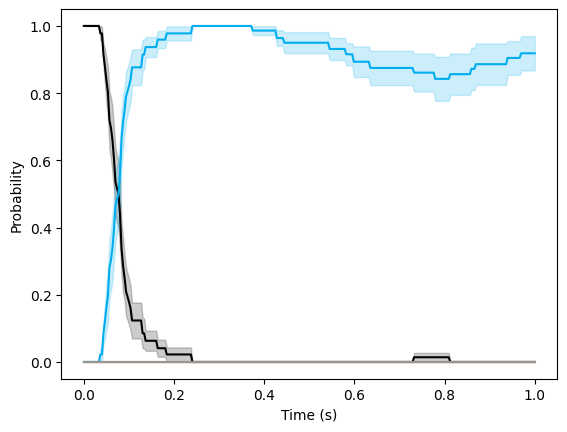

In [16]:
# Plot mean probability
behavior_before = "resting"

# Compute probability of behaviors per animal 
df_trials_of_interest = df[(df.frame == 1) & (df[behavior_before] == 1)]
animal_ids = df_trials_of_interest.animal_id.unique().tolist()

resting = np.zeros((len(animal_ids),300))
walking = np.zeros((len(animal_ids),300))
grooming = np.zeros((len(animal_ids),300))
other = np.zeros((len(animal_ids),300))
flight = np.zeros((len(animal_ids),300))

# Loop over animals
#animal_ids = [animal_ids[0]] # To show specific animals
for animal_id_index, animal_id in enumerate(animal_ids):
    include_animal = False
    experiment = df_trials_of_interest.experiment[df_trials_of_interest.animal_id == animal_id].unique().tolist()[0]
    trials = df_trials_of_interest.trial[df_trials_of_interest.animal_id == animal_id].unique().tolist()

    resting_animal = np.zeros((300))
    walking_animal = np.zeros((300))
    grooming_animal = np.zeros((300))
    other_animal = np.zeros((300))
    flight_animal = np.zeros((300))
    
    # Loop over trial
    for trial_index, trial in enumerate(trials):
        df_sub = df[(df.animal_id == animal_id) & (df.trial == trial)]
  
        resting_animal += df_sub.resting.to_numpy() / len(trials)
        walking_animal += df_sub.walking.to_numpy() / len(trials)
        grooming_animal += df_sub.grooming.to_numpy() / len(trials)
        other_animal += df_sub.other.to_numpy() / len(trials)
        flight_animal += df_sub.flight.to_numpy() / len(trials)
    
    # Display animal and number of trials
    print(str(animal_id) + ': ' + str(len(trials)))

    resting[animal_id_index][:] = resting_animal
    walking[animal_id_index][:] = walking_animal
    grooming[animal_id_index][:] = grooming_animal
    other[animal_id_index][:] = other_animal
    flight[animal_id_index][:] = flight_animal


# Compute mean of means and sem
resting_mean = np.mean(resting,axis=0)
resting_sem = np.std(resting,axis=0) / np.sqrt(len(animal_ids))

walking_mean = np.mean(walking,axis=0)
walking_sem = np.std(walking,axis=0) / np.sqrt(len(animal_ids))

grooming_mean = np.mean(grooming,axis=0)
grooming_sem = np.std(grooming,axis=0) / np.sqrt(len(animal_ids))

other_mean = np.mean(other,axis=0)
other_sem = np.std(other,axis=0) / np.sqrt(len(animal_ids))

flight_mean = np.mean(flight,axis=0)
flight_sem = np.std(flight,axis=0) / np.sqrt(len(animal_ids))


# Plot mean of means 
time = np.linspace(0,1,300)
plt.plot(time, resting_mean, color=color_resting)
plt.fill_between(time, resting_mean-resting_sem, resting_mean+resting_sem, color=color_resting, alpha=.2)
plt.plot(time, walking_mean, color=color_walking)
plt.fill_between(time, walking_mean-walking_sem, walking_mean+walking_sem, color=color_walking, alpha=.2)
plt.plot(time, grooming_mean, color=color_grooming)
plt.fill_between(time, grooming_mean-grooming_sem, grooming_mean+grooming_sem, color=color_grooming, alpha=.2)
plt.plot(time, flight_mean, color=color_flight)
plt.fill_between(time, flight_mean-flight_sem, flight_mean+flight_sem, color=color_flight, alpha=.2)
plt.xlabel('Time (s)')
plt.ylabel('Probability')
plt.show()